In [1]:
import numpy as np

In [2]:
# import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import os
import math
from scipy import signal
import random
import keras
from keras import layers
import tensorflow as tf
import random

In [3]:
pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

In [5]:
from numpy.polynomial.polynomial import Polynomial

def detrend_polynomial(data, degree = 2):
    x = np.arange(len(data))
    poly = Polynomial.fit(x, data, degree)
    trend = poly(x)
    return data - trend


In [7]:
beforeFiles = []
afterFiles = []
path = '/Users/henrywang/Documents/PPGBP/PPGCaffeineDetection/GlucoseReadings'
for dir in os.listdir(path):
    dir_path = os.path.join(path, dir)
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path):
                if file == "AfterEating.txt":
                    afterFiles.append(file_path)
                if file == "BeforeEating.txt":
                    beforeFiles.append(file_path)


print(len(beforeFiles))
print(len(afterFiles))

                

18
18


In [243]:
def min_max_scaling(data):
    data = np.array(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Apply min-max scaling to [0, 1]
    scaled_data = (data - min_val) / (max_val - min_val)
    
    return scaled_data


In [244]:
print(min_max_scaling([1,2,23,4,4,123]))

[0.         0.00819672 0.18032787 0.02459016 0.02459016 1.        ]


In [278]:
#Function to have each sample on the start
from scipy.signal import find_peaks
def standardize_start(wave):
  troughsX, y = find_peaks(-wave, height = 200, distance = 60)
  previous = -250
  start = []
  
  for i in troughsX:
    if i > previous + 500:
      start.append(i - 10)
      previous = i
  return start


34


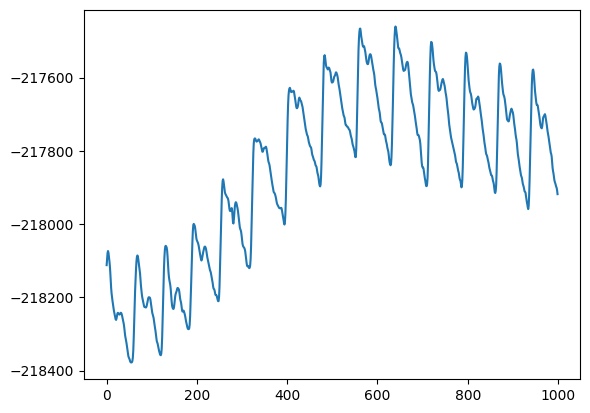

In [279]:
time, y1, y2 = np.loadtxt("/Users/henrywang/Documents/PPGBP/PPGCaffeineDetection/GlucoseReadings/2024-09-07/AfterEating.txt", delimiter = ",", unpack=True)
order = 2  # Filter order
y1 = -y1[20:]
y2 = -y2[20:]

sos = signal.butter(order, 20, fs=100, btype='low', output='sos')

yFiltered1 = signal.sosfiltfilt(sos, y1)
yFiltered2 = signal.sosfiltfilt(sos, y2)
print(len(standardize_start(yFiltered1)))

plt.plot(yFiltered1[:1000])


In [280]:
def findMinTroughs(a):
  inverted = -a
  troughs, y = find_peaks(inverted, distance = 60)
  return np.average(a[troughs])

In [281]:
def findMaxPeaks(a):
  peaks, y = find_peaks(a, distance = 60)
  return np.average(a[peaks])

In [282]:
beforeY1 = []
beforeY2 = []
beforeMinToe = []
beforeMinFinger = []
beforeMaxToe = []
beforeMaxFinger = []

# fpass = [0.5, 4]  # Passband frequency range
order = 2
for file in beforeFiles:
  time, y1, y2 = np.loadtxt(file, delimiter = ",", unpack=True)
  order = 2  # Filter order
  y1 = -y1[100:]
  y2 = -y2[100:]

  sos = signal.butter(order, 20, fs=100, btype='low', output='sos')

  yFiltered1 = signal.sosfiltfilt(sos, y1)
  yFiltered2 = signal.sosfiltfilt(sos, y2)

  starts = standardize_start(yFiltered1)

  for i in starts:
    if (i < len(yFiltered1) - 600):
      beforeY1.append(min_max_scaling(detrend_polynomial(yFiltered1[i: i + 500])))
      beforeY2.append(min_max_scaling(detrend_polynomial(yFiltered2[i: i + 500])))
      # beforeMinToe.append(findMinTroughs(y2[i: i + 1000]))
      # beforeMinFinger.append(findMinTroughs(y1[i: i + 1000]))
      # beforeMaxToe.append(findMaxPeaks(y2[i: i + 1000]))
      # beforeMaxFinger.append(findMaxPeaks(y1[i: i + 1000]))

      beforeMinToe.append(min(y2[i: i + 500]))
      beforeMinFinger.append(min(y1[i: i + 500]))
      beforeMaxToe.append(max(y2[i: i + 500]))
      beforeMaxFinger.append(max(y1[i: i + 500]))

print(len(beforeY1))
print(len(beforeY2))


585
585


In [283]:
afterY1 = []
afterY2 = []
afterMinToe = []
afterMinFinger = []
afterMaxToe = []
afterMaxFinger = []

# fpass = [0.5, 4]  # Passband frequency range
order = 3
for file in afterFiles:
  time, y1, y2 = np.loadtxt(file, delimiter = ",", unpack=True)
  fpass = [0.7, 4]  # Passband frequency range
  order = 2  # Filter order
  y1 = -y1[100:]
  y2 = -y2[100:]

  sos = signal.butter(order, 20, fs=100, btype='low', output='sos')

  yFiltered1 = signal.sosfiltfilt(sos, y1)
  yFiltered2 = signal.sosfiltfilt(sos, y2)

  starts = standardize_start(yFiltered1)

  for i in starts:
    if (i < len(yFiltered1) - 600):
      afterY1.append(min_max_scaling(detrend_polynomial(yFiltered1[i: i + 500])))
      afterY2.append(min_max_scaling(detrend_polynomial(yFiltered2[i: i + 500])))
      # afterMinToe.append(findMinTroughs(y2[i: i + 1000]))
      # afterMinFinger.append(findMinTroughs(y1[i: i + 1000]))
      # afterMaxToe.append(findMaxPeaks(y2[i: i + 1000]))
      # afterMaxFinger.append(findMaxPeaks(y1[i: i + 1000]))

      afterMinToe.append(min(y2[i: i + 500]))
      afterMinFinger.append(min(y1[i: i + 500]))
      afterMaxToe.append(max(y2[i: i + 500]))
      afterMaxFinger.append(max(y1[i: i + 500]))



print(len(afterY1))
print(len(afterY2))
print(afterMinToe)

578
578
[-120659.0, -120667.0, -120695.0, -120686.0, -120657.0, -120551.0, -120515.0, -120506.0, -120537.0, -120604.0, -120593.0, -120570.0, -120565.0, -120585.0, -120602.0, -120593.0, -120578.0, -120593.0, -120648.0, -120613.0, -120572.0, -120541.0, -120633.0, -120657.0, -120621.0, -120627.0, -120604.0, -120649.0, -120624.0, -120707.0, -120705.0, -120693.0, -120768.0, -120761.0, -120467.0, -120522.0, -120685.0, -120794.0, -120859.0, -120833.0, -120814.0, -120844.0, -120872.0, -120904.0, -120475.0, -120625.0, -120443.0, -120673.0, -120735.0, -120759.0, -120867.0, -120834.0, -120899.0, -121013.0, -121102.0, -121126.0, -121005.0, -121118.0, -121008.0, -121171.0, -121038.0, -121211.0, -121266.0, -121248.0, -121327.0, -159200.0, -159865.0, -159986.0, -160257.0, -160023.0, -160169.0, -160333.0, -160608.0, -160693.0, -159502.0, -160182.0, -160283.0, -160502.0, -160360.0, -160045.0, -160111.0, -160198.0, -160517.0, -160289.0, -160547.0, -160307.0, -160230.0, -161585.0, -161674.0, -161316.0, -

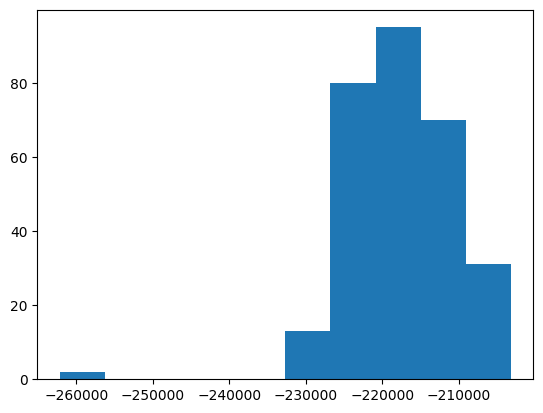

In [251]:
plt.hist(afterMinFinger)
plt.show()

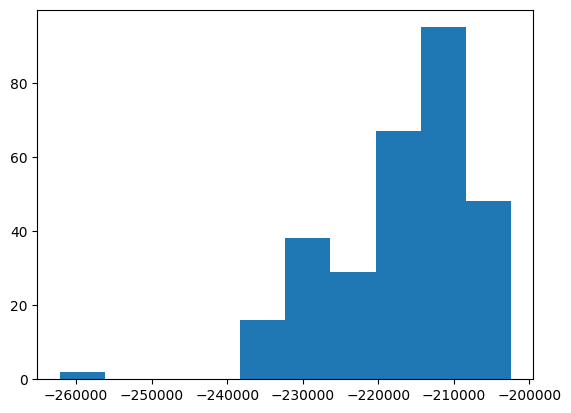

In [252]:
plt.hist(beforeMinFinger)
plt.show()

In [284]:
print(np.average(afterMinFinger))
print(np.average(beforeMinFinger))
print(np.average(beforeMinToe))
print(np.average(afterMinToe))
print("\n")

print(np.average(afterMaxFinger))
print(np.average(beforeMaxFinger))
print(np.average(beforeMaxToe))
print(np.average(afterMaxToe))
print("\n")

print(np.average(afterMaxFinger) - np.average(afterMinFinger))
print(np.average(afterMaxToe) - np.average(afterMinToe))

print(np.average(beforeMaxFinger) - np.average(beforeMinFinger))
print(np.average(beforeMaxToe) - np.average(beforeMinToe))


-217133.92041522491
-216937.32991452992
-147726.42564102565
-139026.39965397923


-214667.90657439447
-215104.91965811964
-146686.95726495725
-137878.56920415224


2466.0138408304483
1147.8304498269863
1832.4102564102795
1039.4683760683984


In [254]:
print(len(afterMaxFinger))
print(len(afterMinFinger))

291
291


In [285]:
differenceAfterMinMax = []
for a in range(len(afterMinFinger)):
  if (afterMaxFinger[a] - afterMinFinger[a]) < 10000:
    differenceAfterMinMax.append(afterMaxFinger[a] - afterMinFinger[a])
differenceBeforeMinMax = []
for a in range(len(beforeMinFinger)):
  if (beforeMaxFinger[a] - beforeMinFinger[a]) < 10000:

    differenceBeforeMinMax.append(beforeMaxFinger[a] - beforeMinFinger[a])

In [286]:
print(np.average(differenceAfterMinMax))
print(np.average(differenceBeforeMinMax))

2006.2904347826086
1671.6518010291595


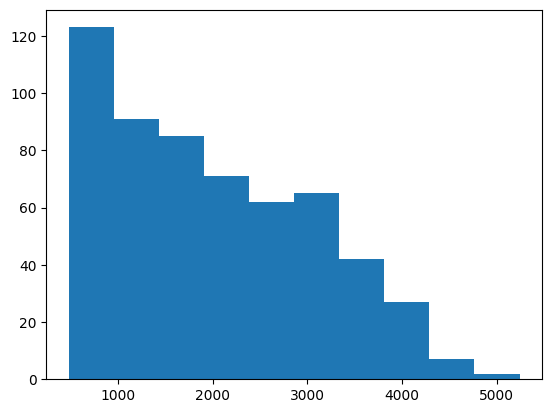

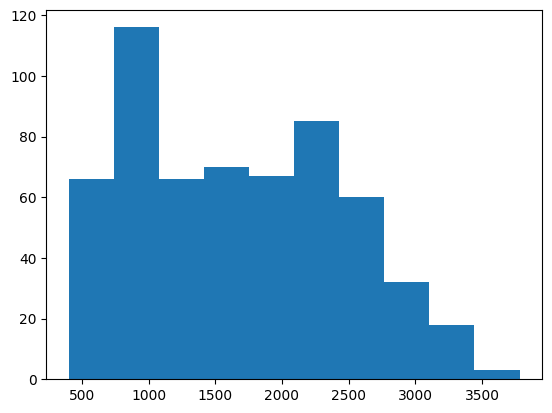

In [287]:
plt.hist(differenceAfterMinMax)
plt.show()
plt.hist(differenceBeforeMinMax)
plt.show()

In [288]:
print(np.std(afterMinFinger))
print(np.std(beforeMinFinger))
print(np.std(beforeMinToe))
print(np.std(afterMinToe))

print(np.std(afterMaxFinger))
print(np.std(beforeMaxFinger))
print(np.std(beforeMaxToe))
print(np.std(afterMaxToe))

6671.494628265928
9072.929286895305
24937.323526904336
29893.98062793216
9421.7527021723
9280.534044575212
24770.499820357087
29681.1973349262


In [ ]:
# def add_noise():
  

In [289]:
zippedRandom = list(zip(afterY1 + beforeY1, afterY2 + beforeY2, [1] * len(afterY1) + [0] * len(afterY2)))

random.shuffle(zippedRandom)

shuffledY1, shuffledY2, label = zip(*zippedRandom)
trainX1 = []
trainX2 = []
testX1 = []
testX2 = []

trainY = []
testY = []

for i in range(0, len(shuffledY1)):
  if i < len(shuffledY1) * 0.8:
    trainX1.append(shuffledY1[i])
    trainX2.append(shuffledY2[i])
    trainY.append(label[i])
  else:
    testX1.append(shuffledY1[i])
    testX2.append(shuffledY2[i])
    testY.append(label[i])

print(len(trainX1))
print(len(testX1))

trainX1 = np.asarray(trainX1)
trainX2 =  np.asarray(trainX2)
testX1 =  np.asarray(testX1)
testX2 =  np.asarray(testX2)

trainY =  np.asarray(trainY)
testY =  np.asarray(testY)



925
231


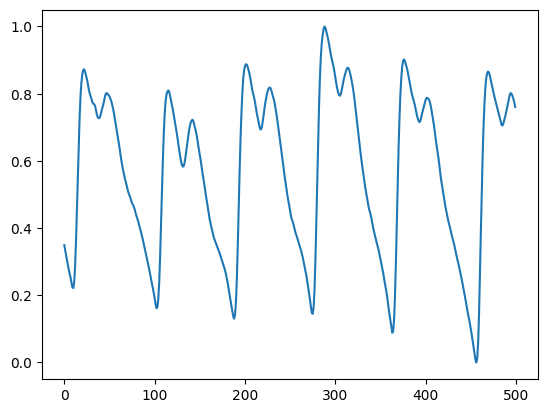

KeyboardInterrupt: 

In [290]:
import time
from IPython.display import clear_output

for i in range(10):
  # print(findAvgTroughs(trainX1[i]))
  plt.plot(trainX1[i])
  plt.show()
  time.sleep(1)
  clear_output()

Creating the model

In [213]:
#residual block code

# fingerReshape2 = layers.Dense(128)(fingerSequentialInput)
# toeReshape2 = layers.Dense(128)(toeSequentialInput)


# pastFingerInput = fingerReshape2

# pastToeInput =  toeReshape2
# for i in range(3):
#   fingerBatchNorm1 = layers.BatchNormalization()(fingerCNN)
#   toeBatchNorm1 = layers.BatchNormalization()(toeCNN)

#   fingerActivation1 = layers.Activation('relu')(fingerBatchNorm1)
#   toeActivation1 = layers.Activation('relu')(toeBatchNorm1)

#   fingerCNN2 = layers.Dense(128, activation = 'relu')(fingerActivation1)
#   toeCNN2 = layers.Dense(128, activation = 'relu')(toeActivation1)

#   fingerAdd = layers.add([fingerCNN2, pastFingerInput])
#   toeAdd = layers.add([toeCNN2, pastToeInput])

#   fingerCNN = layers.Dense(128, activation = "relu")(fingerAdd)
#   toeCNN = layers.Dense(128, activation = "relu")(toeAdd)

#   pastFingerInput = fingerAdd

#   pastToeInput =  toeAdd  

In [301]:
from keras import regularizers

from keras.regularizers import l2
fingerSequentialInput = keras.Input(shape = (500))
toeSequentialInput = keras.Input(shape = (500))

fingerCNN2 = layers.Conv1D(32, 2, activation = "relu", kernel_regularizer='l2')(fingerSequentialInput)
toeCNN2 = layers.Conv1D(32, 2, activation = "relu",  kernel_regularizer='l2')(toeSequentialInput)

finger2d  = layers.Reshape((500, 1))(fingerSequentialInput)
toe2d  = layers.Reshape((500, 1))(toeSequentialInput)

fingerLSTM = layers.LSTM(32)(finger2d)
toeLSTM = layers.LSTM(32)(toe2d)


mergedLayer = layers.Concatenate()([fingerCNN2, toeCNN2])


finalOutput3 = layers.Dense(16, activation = "relu")(mergedLayer)

finalDropout = layers.Dropout(0.1)(finalOutput3)

finalOutput2 = layers.Dense(8)(finalDropout)
finalOutput = layers.Dense(1, activation = "sigmoid")(finalOutput2)

mergeEpoch = 150
mergedModel = keras.Sequential()
mergedModel.reset_states()
mergedModel = keras.models.Model(inputs = [fingerSequentialInput, toeSequentialInput], outputs = finalOutput)
mergedModel.summary()

adamMergeOptimizer = keras.optimizers.legacy.Adam(learning_rate = 0.0001)
# reduceLR = keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10)
mergedModel.compile(optimizer = adamMergeOptimizer, loss = "binary_crossentropy", metrics = ['accuracy'])

ValueError: Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 500)

In [298]:
mergedModel = keras.Sequential()
mergedModel.reset_states()
mergedModel = keras.models.Model(inputs = [fingerSequentialInput, toeSequentialInput], outputs = finalOutput)

adamMergeOptimizer = keras.optimizers.legacy.Adam(learning_rate = 0.1)
# reduceLR = keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10)
mergedModel.compile(optimizer = adamMergeOptimizer, loss = "binary_crossentropy", metrics = ['accuracy'])

In [299]:
mergeEpoch = 500
mergeHistory = mergedModel.fit(x = [trainX1, trainX2], y = trainY, validation_data=([testX1, testX2], testY), batch_size=32, epochs = mergeEpoch)


Epoch 1/500
29/29 [==============================] - 14s 179ms/step - loss: 1.0916 - accuracy: 0.4541 - val_loss: 1.0721 - val_accuracy: 0.4805
Epoch 2/500
29/29 [==============================] - 3s 99ms/step - loss: 0.7911 - accuracy: 0.4757 - val_loss: 0.7417 - val_accuracy: 0.4805
Epoch 3/500
29/29 [==============================] - 3s 89ms/step - loss: 0.7247 - accuracy: 0.4930 - val_loss: 0.7140 - val_accuracy: 0.4805
Epoch 4/500
29/29 [==============================] - 3s 94ms/step - loss: 0.7288 - accuracy: 0.4854 - val_loss: 0.7124 - val_accuracy: 0.5195
Epoch 5/500
29/29 [==============================] - 3s 87ms/step - loss: 0.7079 - accuracy: 0.5005 - val_loss: 0.6994 - val_accuracy: 0.5195
Epoch 6/500
29/29 [==============================] - 3s 86ms/step - loss: 0.7246 - accuracy: 0.4995 - val_loss: 0.6952 - val_accuracy: 0.4805
Epoch 7/500
29/29 [==============================] - 3s 88ms/step - loss: 0.7427 - accuracy: 0.4800 - val_loss: 0.6924 - val_accuracy: 0.5195
Epoc

KeyboardInterrupt: 

In [ ]:
predictions = list(mergedModel.predict(x = [trainX1, trainX2]))
count = 0
zero = 0
for i in range(len(predictions)):
  count += 1
  
  if (predictions[i][0]) < 0.5:
    zero += 1
print(zero)
print(count)

19/19 [==============================] - 0s 4ms/step
582
582


(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([8.86248245e-07, 2.78721927e-06, 4.68819053e-06, 6.58916133e-06,
        8.49013213e-06, 1.03911034e-05, 1.22920746e-05, 1.41930459e-05,
        1.60940162e-05, 1.79949875e-05, 1.98959588e-05]),
 <a list of 582 BarContainer objects>)

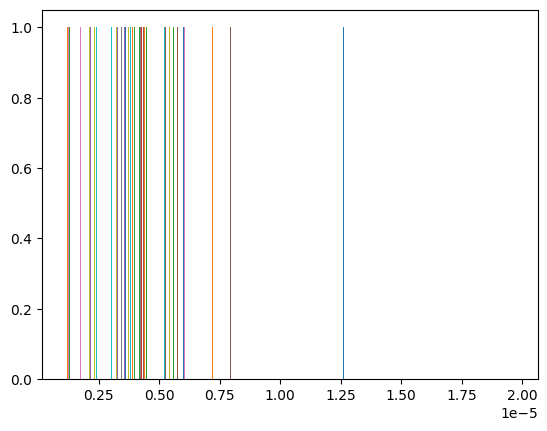

In [ ]:
plt.hist(predictions)